In [ ]:
#The Reuters corpus

[nltk_data] Downloading package punkt to C:\Users\Brandon
[nltk_data]     Lewis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Brandon
[nltk_data]     Lewis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


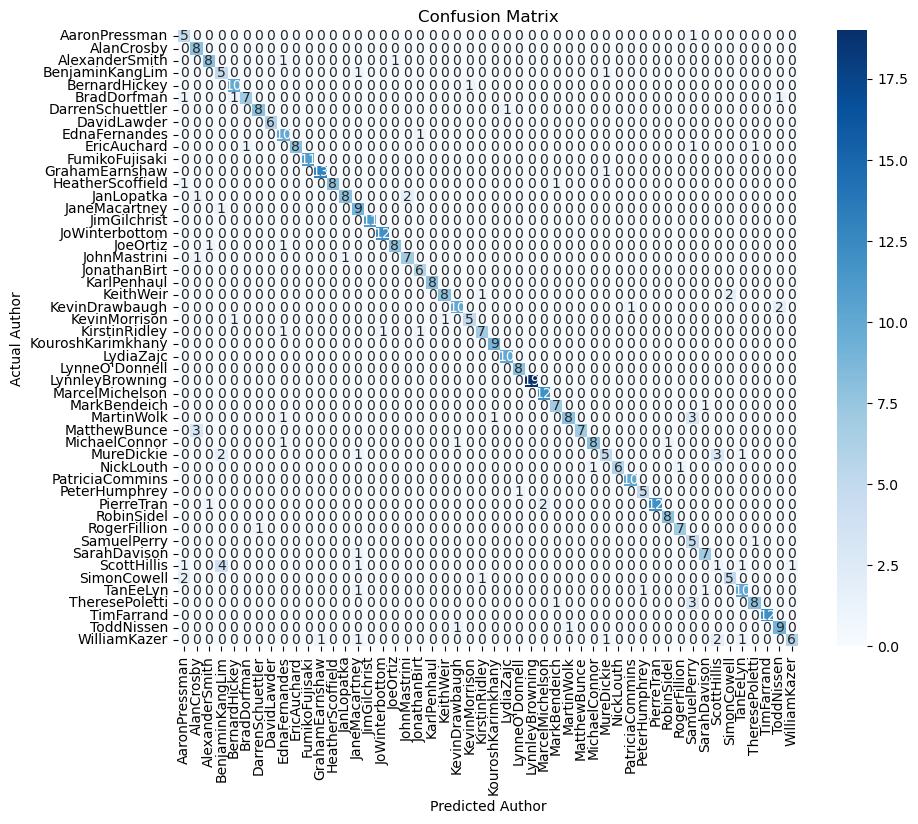

0.82


In [16]:
import os
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

def read_data_from_directory(directory_path):
    texts, labels = [], []
    for author in os.listdir(directory_path):
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            with open(os.path.join(author_path, file_name), 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

train_texts, train_labels = read_data_from_directory("C:\\Users\\Brandon Lewis\\OneDrive\\Desktop\\MSBA\\ML\\STA380-master\\data\\ReutersC50\\C50train")
test_texts, test_labels = read_data_from_directory("C:\\Users\\Brandon Lewis\\OneDrive\\Desktop\\MSBA\\ML\\STA380-master\\data\\ReutersC50\\C50test")

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    return ' '.join(tokens)

vectorizer = CountVectorizer(preprocessor=preprocess_text, max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
X_train, X_test, y_train, y_test = train_test_split(train_dtm, train_labels, test_size=0.2, random_state=1)
clf = LogisticRegression(max_iter=1000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Author")
plt.ylabel("Actual Author")
plt.show()
print(f"{accuracy:.2f}")


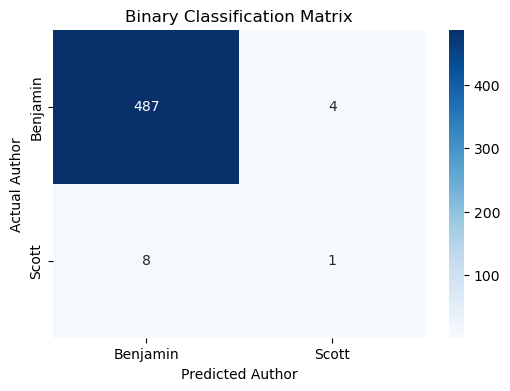

0.98


In [30]:
binary_train_labels = [1 if label == 'ScottHillis' else 0 for label in train_labels]
binary_test_labels = [1 if label == 'ScottHillis' else 0 for label in test_labels]


X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(train_dtm, binary_train_labels, test_size=0.2, random_state=1)
if 0 in y_train_bin and 1 in y_train_bin:
    clf_bin = LogisticRegression(max_iter=1000, random_state=1)
    clf_bin.fit(X_train_bin, y_train_bin)
    y_pred_bin = clf_bin.predict(X_test_bin)
    accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
    conf_mat_bin = confusion_matrix(y_test_bin, y_pred_bin)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat_bin, annot=True, fmt="d", cmap="Blues", xticklabels=['Benjamin', 'Scott'], yticklabels=['Benjamin', 'Scott'])
    plt.title("Binary Classification Matrix")
    plt.xlabel("Predicted Author")
    plt.ylabel("Actual Author")
    plt.show()
    print(f"{accuracy_bin:.2f}")

In [ ]:
#In this exercise we were taking a look at the Reuters C50 text corpus and trying to determine if a model (logistic regression) could accurately predict the author of a passage based on the text provided. Essentially we wanted to answer the question, how well can predict an author based on various textual documents?

In [ ]:
#In this exercise we leveraged a few different analytical tools. Initally, we cleaned the data through tokenization, where we removed all punctuation and made the cases lowercase to create uniformity. Then we used a vectorizer to convert the text into numbers so the model could understand. Lastly, we performed the necessary steps of a logistic regression where we had test and training data to determine the model's accuracy, as well as visually plotted the predicitons within a confusion matrix.

In [ ]:
#The logisitic regression returned an accuracy of about 82% which is relatively good in terms of predicting the author from the different texts. It's interesting to see that in the confusion matrix, the model predicted the correct author the vast majority of the time, except for Scott Hillis. Scott is the only author where the model inaccurately predicted another author, Benjamin Kang Lim, most of the time. Benjamin was predicted to have written the text 4/9 times whereas Scott was only predicted once. However, when the model predicted Banjamin's texts it never predicted Scott to the the author. In taking a look at the text, we can see that both Scott and Benjamin seem to be writing and covering poltical news regarding China, from an American's perspective. We thought there might be more to this insight, so we ran a Binary Classification Matrix on just Scott and Benjamin, and with 98& accuracy we see that Scott's texts were only predicted to be his 1/9 times whereas Benjamin's texts were predicted to be his 487/491 times.

In [ ]:
#Based on our findings from this exercise, we believe that this model of logistic regression can strongly predict the actual author given some text. Out of all 50 authors in the dataset, there is only one instance where the model incorrectly predicted another author than the actual one. This is insignifacnt in the grand scheme of things, hwoever after doing further analysis we see that is most likely due to the nature of the text, as both men write about US-China news relations. Overall, this logistic regression is strong and should be leveraged when needed to better understand different writing styles and similarities bewteen authors. 